The main focus of this dataset is to get to know the population of EDA vehicles providing us with the dataset of the model,country,year,vehicle type, city and the electric ranges and provides insights into the distribution of electric vehicle data, relationships between variables, and differences in electric range between vehicle types.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from statsmodels.graphics.gofplots import qqplot

# STEP 1: LOAD DATA

In [43]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [44]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [46]:
df = df.drop(columns=['VIN (1-10)','Postal Code','Vehicle Location','DOL Vehicle ID','2020 Census Tract'])

In [47]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,PUGET SOUND ENERGY INC


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             150479 non-null  object 
 1   City                                               150479 non-null  object 
 2   State                                              150482 non-null  object 
 3   Model Year                                         150482 non-null  int64  
 4   Make                                               150482 non-null  object 
 5   Model                                              150482 non-null  object 
 6   Electric Vehicle Type                              150482 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150482 non-null  object 
 8   Electric Range                                     150482 non-null  int64 

# STEP 2: CLEANING

In [49]:
df.describe()

,Model Year,Electric Range,Base MSRP,Legislative District
count,150482.000000,150482.000000,150482.000000,150141.000000
mean,2020.005436,67.877839,1312.644735,29.343950
std,3.015209,96.230009,9231.310215,14.824829
min,1997.000000,0.000000,0.000000,1.000000
25%,2018.000000,0.000000,0.000000,18.000000
50%,2021.000000,18.000000,0.000000,33.000000
75%,2023.000000,97.000000,0.000000,43.000000
max,2024.000000,337.000000,845000.000000,49.000000


In [50]:
df.isna().sum()

County                                                 3
City                                                   3
State                                                  0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
Electric Utility                                       3
dtype: int64

In [51]:
df = df.dropna()

In [52]:
df.isna().sum()

County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Electric Utility                                     0
dtype: int64

In [53]:
df = df[df['Electric Range'] >= 0]

# STEP 3: DATA VISUALIZATION AND STAT ANALYSIS

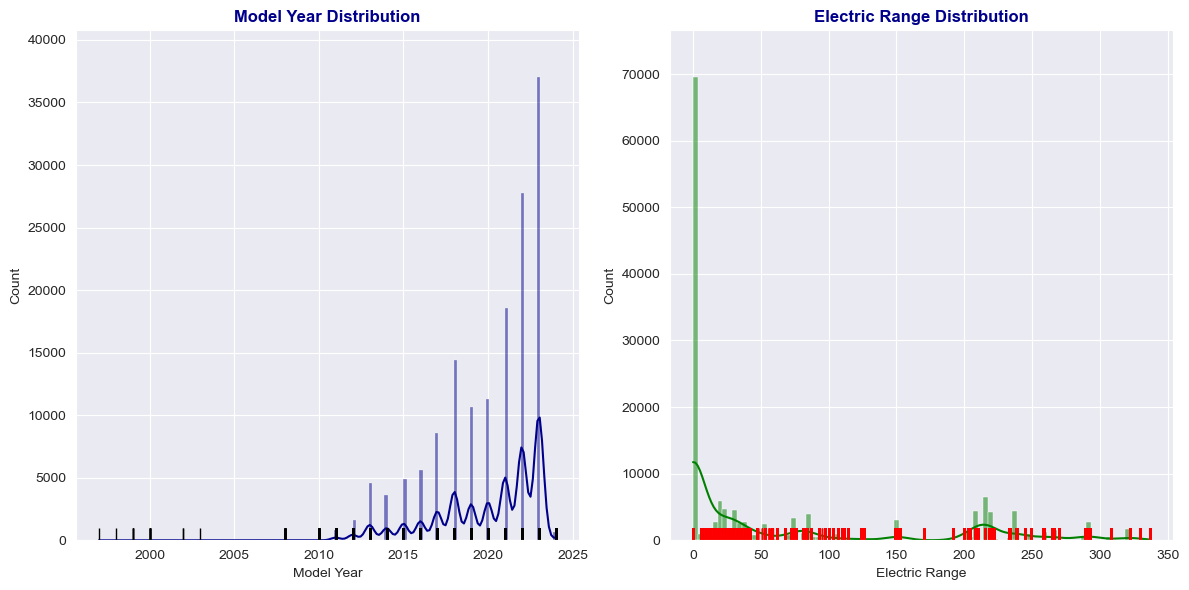

In [54]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df, x='Model Year', kde=True, color='darkblue', line_kws={'linewidth': 1.5}, ax=axes[0])
sns.rugplot(df, x='Model Year', color='black', ax=axes[0])
axes[0].set_title('Model Year Distribution', fontsize=12, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Model Year')

sns.histplot(df, x='Electric Range', kde=True, color='green', line_kws={'linewidth': 1.5}, ax=axes[1])
sns.rugplot(df, x='Electric Range', color='red', ax=axes[1])
axes[1].set_title('Electric Range Distribution', fontsize=12, fontweight='bold', color='darkblue')
axes[1].set_xlabel('Electric Range')

plt.tight_layout()
plt.show()

In [55]:
cols_num = df.select_dtypes(include = ['float','int']).columns.to_list()

for col in cols_num:
    print('==' * 30)
    print(f'Variable: {col}\n')
    print(f'Skew = {df[col].skew()}')
    print(f'Kurtosis = {df[col].kurt()}')
    print('==' * 30)
    print('\n')

Variable: Model Year

Skew = -0.978696751550036
Kurtosis = 0.23628265078380783


Variable: Electric Range

Skew = 1.219641264739993
Kurtosis = -0.03164204788268998


Variable: Base MSRP

Skew = 11.952089897522864
Kurtosis = 521.1094154263785


Variable: Legislative District

Skew = -0.48388861458113724
Kurtosis = -1.0666382684831253




C:\Users\samra\AppData\Local\Temp\ipykernel_24536\475843274.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


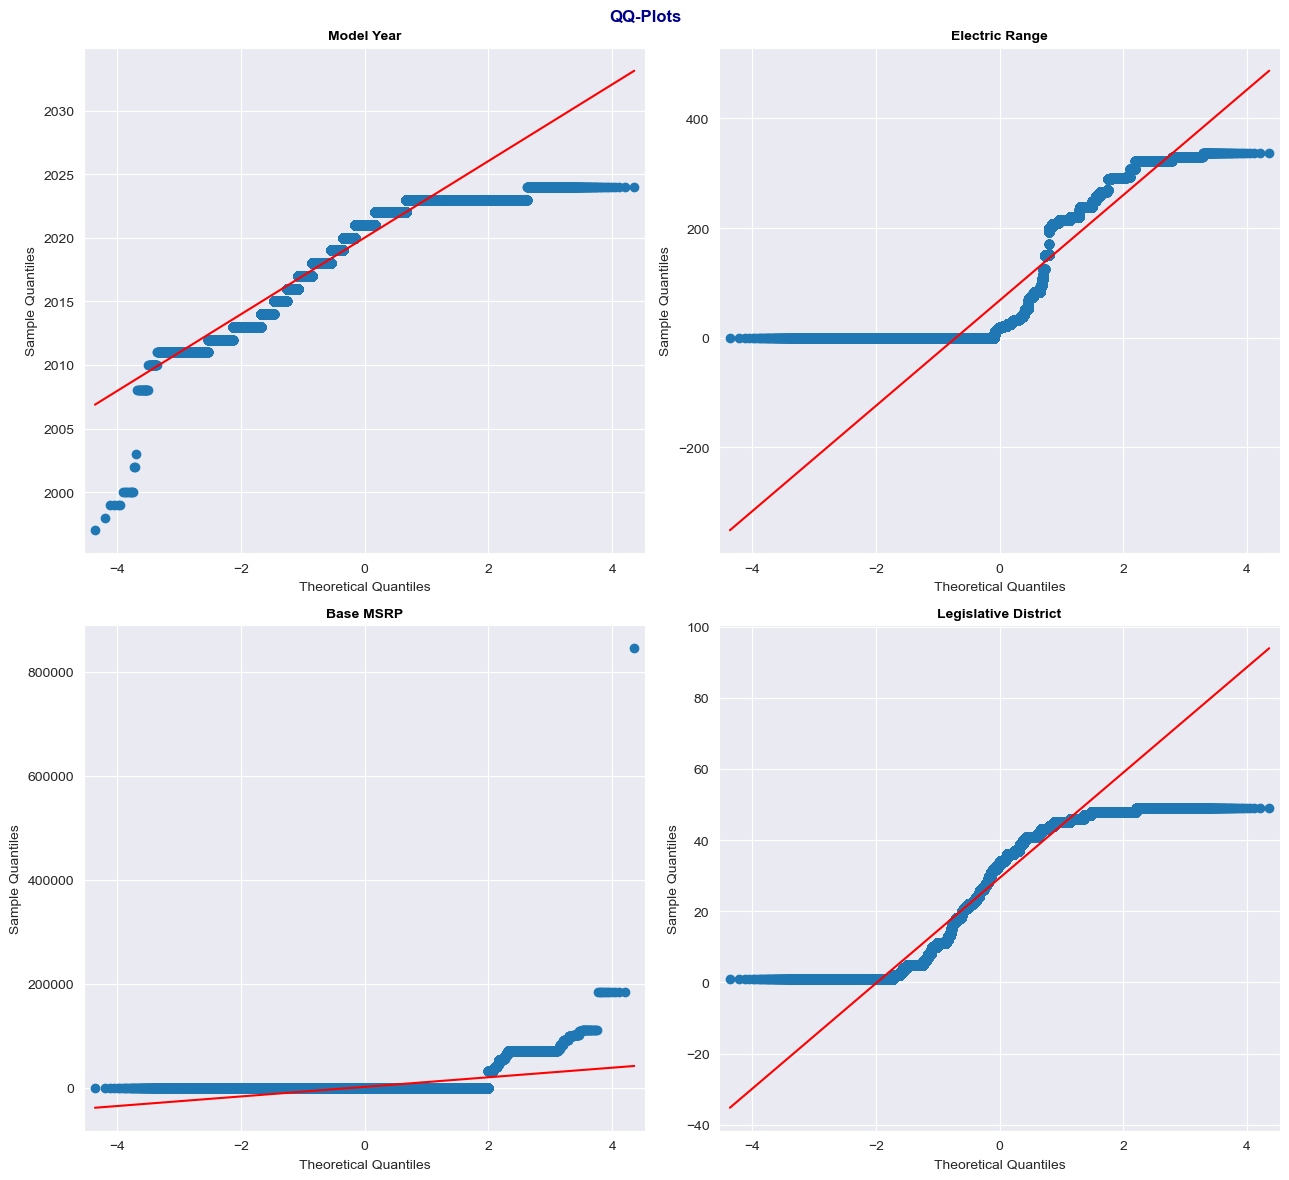

In [56]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 12))
axes = axes.flat

for i,col in enumerate(cols_num):
    qqplot(df[col], 
           line = 's', 
           ax = axes[i])
    
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold', color = 'black')
    

fig.suptitle('QQ-Plots', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()


Categorical Counts:
 Battery Electric Vehicle (BEV)            116585
Plug-in Hybrid Electric Vehicle (PHEV)     33556
Name: Electric Vehicle Type, dtype: int64


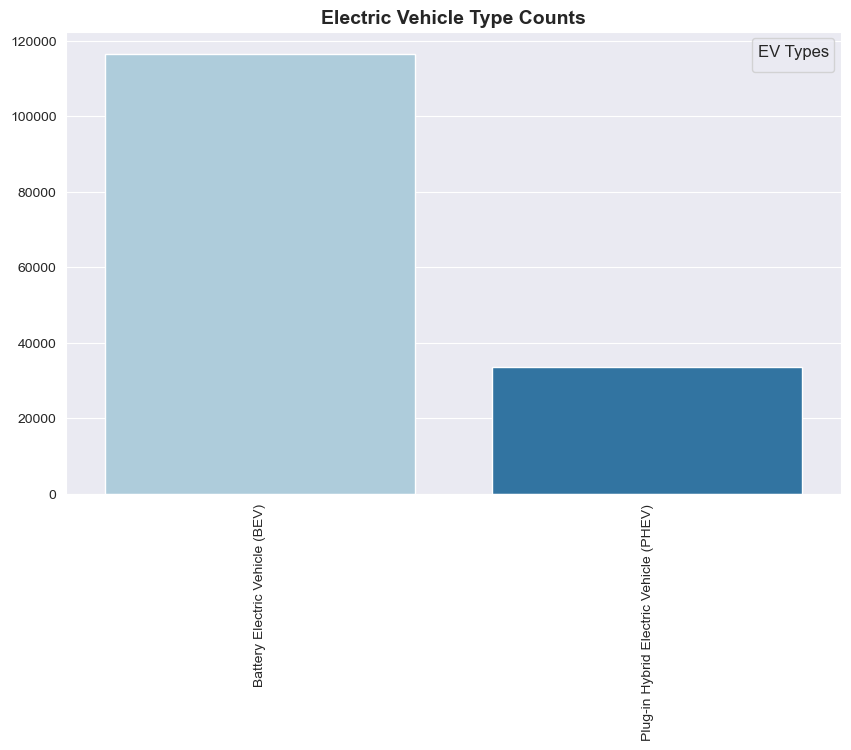

In [57]:
categorical_counts = df['Electric Vehicle Type'].value_counts()
print("\nCategorical Counts:\n", categorical_counts)

custom_palette = sns.color_palette("Paired")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=categorical_counts.index, y=categorical_counts.values, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Electric Vehicle Type Counts', fontsize=14, fontweight='bold')

h, _ = ax.get_legend_handles_labels()
ax.legend(h, categorical_counts.index, title="EV Types", title_fontsize=12, loc="upper right")

plt.show()

It can be seen that Battery Electric Vehicle has vast amounts compared to Plug in Hybrid Electrical Vehicle with over 83,000 more vehicles.

C:\Users\samra\AppData\Local\Temp\ipykernel_24536\4252367683.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


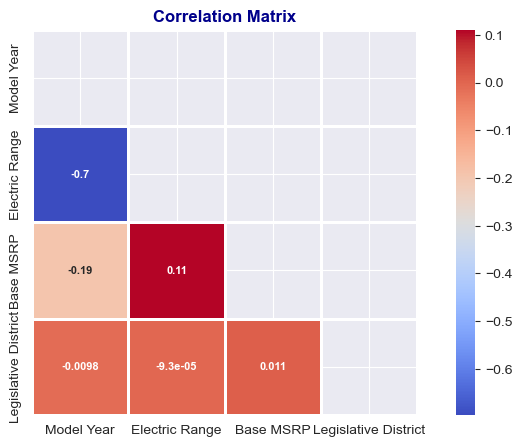

In [58]:
corr_matrix = df[cols_num].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize':8, 'fontweight':'bold'}, 
            linewidths = 1.0, square = True, mask = mask, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.show()

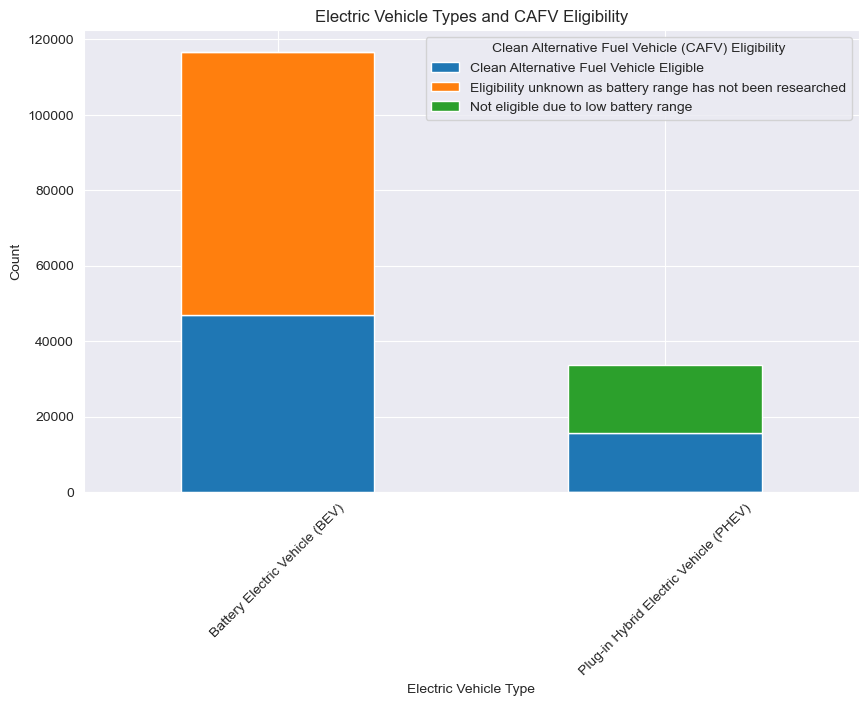

In [59]:
ev_type_cafv =df.groupby(['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Vehicle Type'].count().unstack()
ev_type_cafv.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Electric Vehicle Types and CAFV Eligibility')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
df.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility'],
      dtype='object')

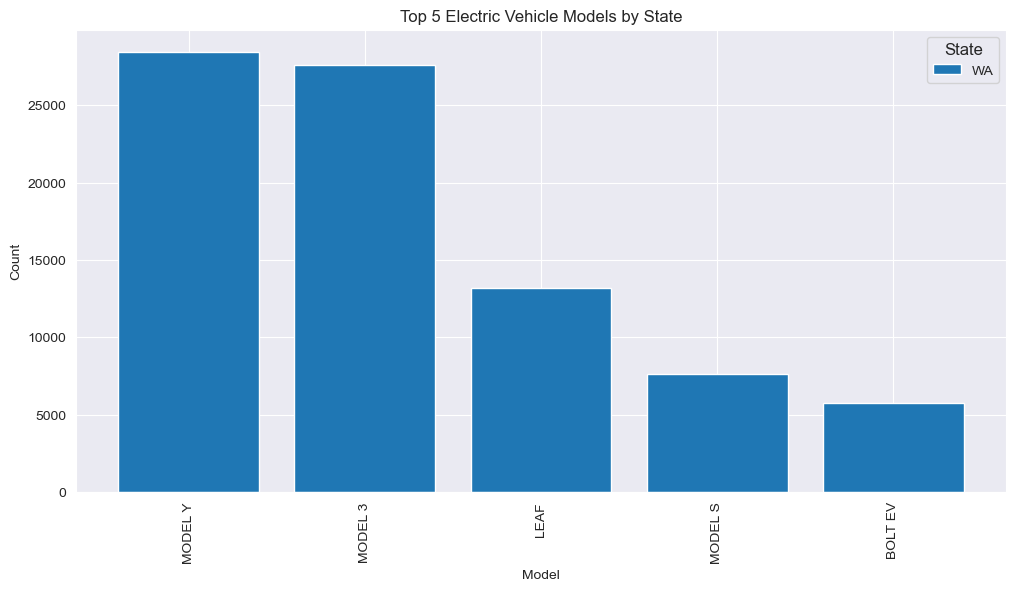

In [61]:
import matplotlib.pyplot as plt

# Create a bar plot to show the top 5 models by count in each state using Matplotlib
plt.figure(figsize=(12, 6))
for state in df['State'].unique():
    state_data = df[df['State'] == state]
    model_counts = state_data['Model'].value_counts().head(5)  # Select the top 5 models
    plt.bar(model_counts.index, model_counts.values, label=state)

plt.title('Top 5 Electric Vehicle Models by State')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='State', title_fontsize=12)
plt.show()

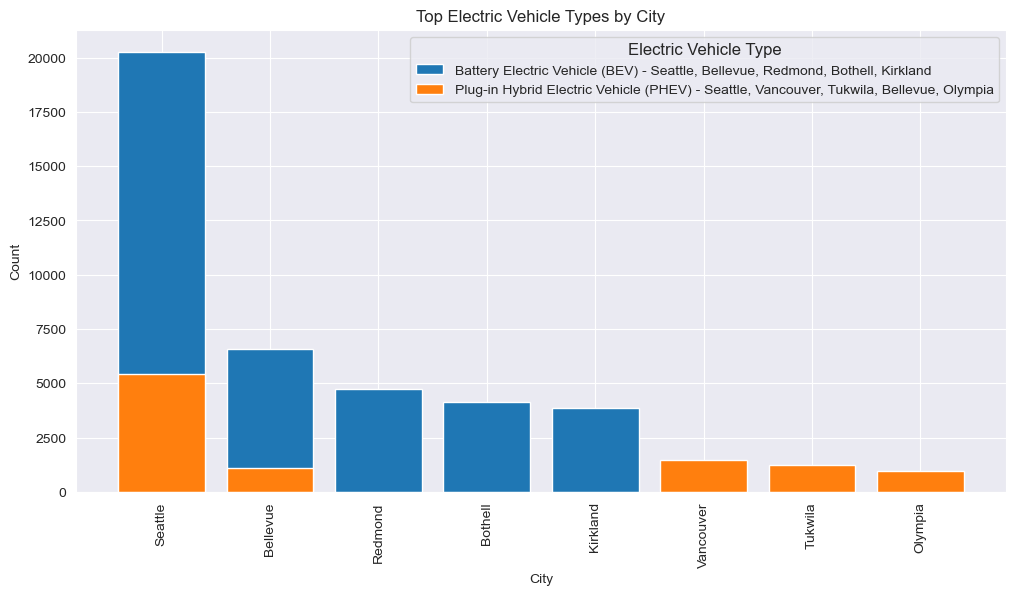

In [62]:
plt.figure(figsize=(12, 6))

top_cities_by_type = {}

for ev_type in df['Electric Vehicle Type'].unique():
    ev_type_data = df[df['Electric Vehicle Type'] == ev_type]
    city_counts = ev_type_data['City'].value_counts().head(5) 
    plt.bar(city_counts.index, city_counts.values, label=ev_type)
    
    top_cities_by_type[ev_type] = city_counts.index.tolist()

plt.title('Top Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)

top_legend_labels = [f"{ev_type} - {', '.join(top_cities_by_type[ev_type])}" for ev_type in df['Electric Vehicle Type'].unique()]
plt.legend(top_legend_labels, title='Electric Vehicle Type', title_fontsize=12)

plt.show()

# HYPOTHESIS TESTING

In [63]:
from scipy.stats import ttest_ind
ev_type_1 = df[df['Electric Vehicle Type'] == 'Type 1']['Electric Range']
ev_type_2 = df[df['Electric Vehicle Type'] == 'Type 2']['Electric Range']

t_stat, p_value = ttest_ind(ev_type_1, ev_type_2, equal_var=False)
if p_value < 0.05:  
    print("There is a significant difference in electric range between the two vehicle types.")
else:
    print("There is no significant difference in electric range between the two vehicle types.")

There is no significant difference in electric range between the two vehicle types.


The t-test is run, and the results are a t-statistic (t_stat) and a p-value (p_value). The t-statistic calculates the difference in means between two groups, and the p-value shows the likelihood of seeing such a difference if there was no difference between the groups.The code then compares the calculated p-value to a significance level (often set at 0.05 or 5%).  If the p-value is less than the level of significance, the results are statistically significant, and the null hypothesis is rejected. When the p-value exceeds the significance level, the results are not statistically significant, and the null hypothesis is not rejected.